# Import Key Libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Data Cleaning

In [101]:
# Load dataset

df = pd.read_csv("df_all_rounds.csv")

### Zip Code

In [102]:
# Create a column for zip code

df['zip_code'] = [url[url.find("VT")+3:url.find("VT")+8] for url in df['link']]

In [103]:
# Drop links column

df = df.drop(['link'], axis = 1)

### View Description

In [104]:
# Regroup view description so all "Mountain(s)" become "Mountain"

df['view_description'].unique()

array(['{}', ' Mountain(s)', ' Mountain(s), Water', ' Water', ' Mountain'],
      dtype=object)

In [105]:
df['view_description'] = [view.replace("Mountain(s)","Mountain") for view in df['view_description']]
df['view_description'].unique()

array(['{}', ' Mountain', ' Mountain, Water', ' Water'], dtype=object)

### Lot Size

In [106]:
# Drop where lot size column includes a price per year (a few HOA fees are here)

df = df.drop(df[df.lot_size.str.contains(r'[$]')].index)

In [107]:
# Take acres out of lot size 

df['lot_size'] = [lot.split(" ")[0] for lot in df['lot_size']]
df['lot_size'] = [lot.replace(",","") for lot in df['lot_size']]

In [108]:
# Convert to float 64

df['lot_size'] = pd.to_numeric(df['lot_size'],errors='coerce')

### Home Square Footage

In [109]:
# Take sqft out of square footage

df['sf'] = [footage.split(" ")[0] for footage in df['sf']]
df['sf'] = [footage.replace(",","") for footage in df['sf']]

In [110]:
# Convert to float 64

df['sf'] = pd.to_numeric(df['sf'],errors='coerce')

### Bathrooms

In [111]:
# Take ba out of bathrooms

df['bathrooms'] = [bathroom.split(" ")[0] for bathroom in df['bathrooms']]

In [112]:
# Convert to float 64

df['bathrooms'] = pd.to_numeric(df['bathrooms'],errors='coerce')

### Home Price

In [113]:
# Take dollar signs out of price

df['price'] = [value.split("$")[1] for value in df['price']]
df['price'] = [value.replace(",","") for value in df['price']]

In [114]:
# Convert to float 64

df['price'] = pd.to_numeric(df['price'],errors='coerce')

In [115]:
df.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sf', 'year_built',
       'lot_size', 'view_description', 'on_waterfront', 'house_style',
       'new_construction', 'garage_spaces', 'zip_code'],
      dtype='object')

In [116]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [117]:
df.head()

,price,bedrooms,bathrooms,sf,year_built,lot_size,view_description,on_waterfront,house_style,new_construction,garage_spaces,zip_code
0,84900,2,2.0,902.0,1960,400752.0,{},{},Ranch,No,1,05045
1,335000,2,2.0,1680.0,1986,304920.0,{},{},Cape,No,0,05677
3,245000,3,2.0,1268.0,1960,174240.0,{},{},Cape,No,0,05730
4,374000,9,9.0,5788.0,1861,56628.0,{},{},Victorian,No,2,05143
5,360000,3,2.0,1804.0,1962,18295.0,{},{},Raised Ranch,No,2,05482


### Year Built

In [118]:
# Convert to float 64
df['year_built'] = pd.to_numeric(df['year_built'],errors='coerce')

### Waterfront

In [119]:
df['on_waterfront'] = [value.replace("{}","No") for value in df['on_waterfront']]

### Drop NaNs and null values

In [120]:
df.dropna(inplace=True)

In [121]:
df.shape

(730, 12)

# Exploratory Work

In [122]:
df.corr()

,price,bedrooms,bathrooms,sf,year_built,lot_size,garage_spaces
price,1.000000,0.295525,0.531893,0.702557,0.073997,0.316010,0.276666
bedrooms,0.295525,1.000000,0.709649,0.605137,-0.134394,0.110465,0.338989
bathrooms,0.531893,0.709649,1.000000,0.813832,0.003199,0.147100,0.447216
sf,0.702557,0.605137,0.813832,1.000000,-0.014472,0.252751,0.430452
year_built,0.073997,-0.134394,0.003199,-0.014472,1.000000,0.003150,0.022956
lot_size,0.316010,0.110465,0.147100,0.252751,0.003150,1.000000,0.142728
garage_spaces,0.276666,0.338989,0.447216,0.430452,0.022956,0.142728,1.000000


# Simple Model - SF and Sale Price

Text(0.5, 1.0, 'House Price vs. Square Footage in VT')

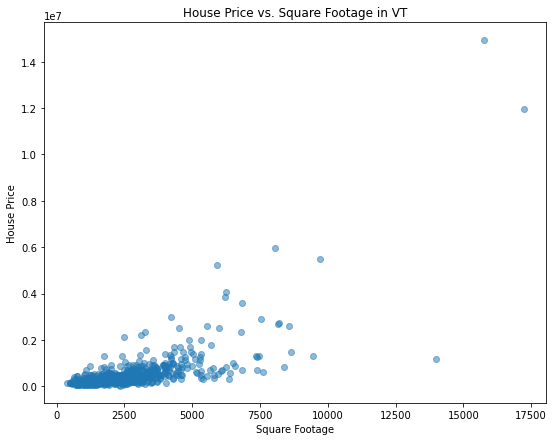

In [123]:
# Plot sale price vs. square footage

fig, ax = plt.subplots(figsize = (9,7))

x = df[['sf']]
y = df['price'] 

ax.scatter(x,y,alpha=.5)
ax.set_xlabel("Square Footage")
ax.set_ylabel("House Price")
ax.set_title("House Price vs. Square Footage in VT")

In [124]:
# Simple regression

lr = LinearRegression()

lr.fit(x,y)
lr.score(x,y)

0.4935857186936675

In [125]:
# Plot our prediction

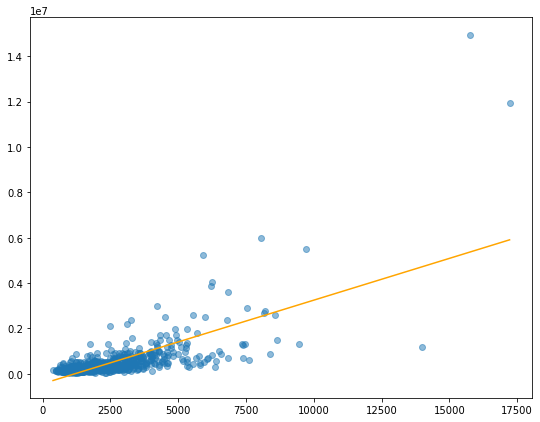

In [126]:
fig, ax = plt.subplots(figsize=(9, 7))

x = df[['sf']]
y = df['price']
ax.scatter(x, y, alpha=.5)

_x = np.linspace(x.min(), x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange')

In [127]:
# Caclulat eequation of line 

print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')

slope: 368.34
y-intercept: -438643.03


# Categorical Variables 

In [130]:
# Start with on waterfront

df['on_waterfront'].value_counts()
cat_X = df.loc[:,["on_waterfront"]]
cat_Y = df['price']

In [136]:
ohe = OneHotEncoder(drop="first",sparse=False)

ohe.fit(cat_X)

ohe_X = ohe.transform(cat_X)

columns = ohe.get_feature_names(['on_waterfront'])

ohe_X_df = pd.DataFrame(ohe_X,columns = columns, index = cat_X.index)

ohe_X_df.head()

,on_waterfront_No
0,1.0
1,1.0
3,1.0
4,1.0
5,1.0


In [138]:
cat_lr = LinearRegression()

cat_lr.fit(ohe_X_df, cat_Y)

cat_lr.score(ohe_X_df, cat_Y)

0.03707512668491619

In [139]:
cat_lr.coef_

array([-386001.58714969])

In [140]:
# Combining into one model

combined_df = pd.concat([ohe_X_df, df[['sf']]], axis=1)
combined_df.head()

,on_waterfront_No,sf
0,1.0,902.0
1,1.0,1680.0
3,1.0,1268.0
4,1.0,5788.0
5,1.0,1804.0


In [144]:
combined_lr = LinearRegression()

combined_lr.fit(combined_df, cat_Y)

combined_lr.score(combined_df, cat_Y)

0.5063680389993913

In [145]:
combined_lr.coef_, combined_lr.intercept_

(array([-228140.84252499,     361.5227288 ]), -254947.97892555362)

In [ ]:
# Get dummis for garage spaces

In [13]:
# Get Dummies for new construction

In [ ]:
# Get dummis for waterfront

In [328]:
# Get dummis for home type